<h1 style="color:red">Battle Of Neighbourhoods</h1>

## <span style="color:red">Table of contents</span>
* [Introduction](#introduction)
* [Project Description](#data)
* [Data](#data)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

<h1 style='color:red'>Introduction</h1>
Bangalore is called as The Silicon Valley of India because of the large number of information technology companies located in the city which contributed 33% of India's ₹1,442 billion (US$21 billion) IT exports.In recent decades, the city has witnessed rapid growth in population and urbanised area. While Central Bangalore is the commercial heart of the city, Eastern and South-Eastern Bangalore areas are major hubs for IT and financial companies. Southern and Western parts of the city are mainly residential areas. The neighbourhoods in the Northern and North-Eastern regions are both industrial and residential.


<h1 style='color:red'>Project Description</h1>
This project demonstrates an analysis of venues in Bangalore(India) using heterogeneous data sources and data science methods. This requires the extraction, load, transformation and analysis of all data sources contained in the following notebook.<br><br>
Since Bangalore is cosmopolitan there are lots of venues in Bangalore, so we will try to segment venues into <b>Clusters(based on geographical location)</b>. We are also particularly interested in people who visiting Bangalore and want to explore the city. Futhermore We would also prefer popular locations as there will also be people on a <b>short-trip.</b>

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

### Target Audience
<ul>
<li>In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to         traveller interested in exploring <b>different Venue</b> in <b>Bangalore</b>, India.</li>
</ul>

<h1 style="color:red">Data</h1>
The data is fetched from following resources:
<ul>
<li>Four Square API</li>
</ul>

<h1 style='color:red'>Analysis</h1>

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans

In [2]:
# co-ordinates of Bangalore
latitude = '12.9716'
longitude = '77.5946'

### Four Square API

In [3]:
CLIENT_ID = '00IVVZKELM2KPVHLPFMUXMY5QZHDGZPX5SSB4HURZJ2KKKMT' # your Foursquare ID
CLIENT_SECRET = 'ZZQNWZTOEZSYA2MXCQBU12OIELDNEQQH3YKKJBDNIWYZ0ZF4' # your Foursquare Secret
VERSION = '20190605' # Foursquare API version

### Getting Recommended Venues
<b><i><u>https://api.foursquare.com/v2/venues/explore?</u></i></b>  API is used to get the Popular places of Bangalore

In [4]:
LIMIT = 100
radius=500
def getRecommended(latitude, longitude):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius,
#             category,
            LIMIT)
    results = requests.get(url).json()["response"]["groups"][0]['items']
    Recommended_list = []
    for v in results:
            Recommended_list.append([( 
            v['venue']['name'],
            v['venue']['location']['formattedAddress'][0],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name'])])
            
        
    Recommended = pd.DataFrame([item for venue in Recommended_list for item in venue])
    Recommended.columns = [ 
                  'VenueName', 
                   'Address',
                  'Latitude', 
                  'Longitude', 
                  'SubCategory']
    return(Recommended)
recommended = getRecommended(latitude,longitude)

In [5]:
recommended.head()

,VenueName,Address,Latitude,Longitude,SubCategory
0,JW Marriott Hotel Bengaluru,24/1 Vittal Mallya Road,12.972362,77.595051,Hotel
1,UB City,at Vittal Mallya Rd,12.971709,77.595905,Shopping Mall
2,Toscano,UB City Level 2 Concorde Block (24 Vittal Mall...,12.971980,77.596066,Italian Restaurant
3,J W Kitchen,Near U B City (Vittal Mallya Road),12.972410,77.594592,Asian Restaurant
4,Shiro,"3rd Flr., UB City, Vittal Mallya Rd. (Lavelle ...",12.971900,77.596236,Japanese Restaurant


In [6]:
recommended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
VenueName      54 non-null object
Address        54 non-null object
Latitude       54 non-null float64
Longitude      54 non-null float64
SubCategory    54 non-null object
dtypes: float64(2), object(3)
memory usage: 1.5+ KB


### Getting All Venues
<b><i><u>https://api.foursquare.com/v2/venues/explore?</u></i></b>  API is used to get the all venues of Bangalore.

In [7]:
LIMIT = 500
radius=1000
def getVenues(latitude, longitude):
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius,
#             category,
            LIMIT)
    results = requests.get(url).json()["response"]["venues"]
    Venue_list = []
    for v in results:
            if v['categories'] != []:
                Venue_list.append([( 
                v['name'],
                v['location']['formattedAddress'][0],
                v['location']['lat'], 
                v['location']['lng'],
                v['categories'][0]['name'])])
    Venue = pd.DataFrame([item for venue in Venue_list for item in venue])
    Venue.columns = [ 
                  'VenueName', 
                    'Address',
                  'Latitude', 
                  'Longitude',
                  'SubCategory']
    return(Venue)
venues = getVenues(latitude,longitude)

In [8]:
venues

,VenueName,Address,Latitude,Longitude,SubCategory
0,Coffee Day Square,"#23/2, Near UB City (Near UB City)",12.971671,77.594132,Coffee Shop
1,JW Marriott Executive Lounge,India,12.972120,77.594804,Lounge
2,Kanteerava Indoor Stadium,Corporation Circle,12.969619,77.593861,Stadium
3,Sree Kanteerava Stadium,India,12.969581,77.593107,Stadium
4,Cafe Coffee Day HQ,"23/2,Coffee Day Square,Vittal Mallaya Road",12.971827,77.594242,Office
5,Alba,JW Marriott Bengaluru (Vittal Mallya Road),12.972541,77.594594,Italian Restaurant
6,BBC by JW Marriott,Bangalore,12.971847,77.595088,Café
7,JW Marriott Hotel Bengaluru,24/1 Vittal Mallya Road,12.972362,77.595051,Hotel
8,Bangalore,Karnātaka,12.972938,77.604415,City
9,INFOSYS 3,Cafe Coffee Day INFOSYS CAMPUS 3 RD COUNTER EL...,12.971598,77.593996,Office


In [9]:
venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
VenueName      187 non-null object
Address        187 non-null object
Latitude       187 non-null float64
Longitude      187 non-null float64
SubCategory    187 non-null object
dtypes: float64(2), object(3)
memory usage: 5.2+ KB


### Categorising data into following Parent Categories

In [10]:
def giveCategory(self):
    self.replace('Café','Cafe')
    if 'Restaurant' in  self:
        return 'Restaurant'
    elif self == 'Coffee Shop':
        return 'Cafe'
    elif self == 'Café':
        return 'Cafe'
    else:
        return self
recommended['Category'] = recommended['SubCategory'].apply(giveCategory)
venues['Category'] = venues['SubCategory'].apply(giveCategory)

### Clustering the data based on their Latitude and Longitude


#### Recommended

In [11]:
kclusters = 5

cluster = recommended[['Latitude','Longitude']]
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster)
recommended['Cluster Labels'] = kmeans.labels_
recommended.head()

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,JW Marriott Hotel Bengaluru,24/1 Vittal Mallya Road,12.972362,77.595051,Hotel,Hotel,2
1,UB City,at Vittal Mallya Rd,12.971709,77.595905,Shopping Mall,Shopping Mall,4
2,Toscano,UB City Level 2 Concorde Block (24 Vittal Mall...,12.971980,77.596066,Italian Restaurant,Restaurant,4
3,J W Kitchen,Near U B City (Vittal Mallya Road),12.972410,77.594592,Asian Restaurant,Restaurant,2
4,Shiro,"3rd Flr., UB City, Vittal Mallya Rd. (Lavelle ...",12.971900,77.596236,Japanese Restaurant,Restaurant,4


In [12]:
recommended.shape

(54, 7)

#### Venues

In [13]:
kclusters = 5
cluster = venues[['Latitude','Longitude']]
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster)
venues['Cluster Labels'] = kmeans.labels_
venues.head()

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Coffee Day Square,"#23/2, Near UB City (Near UB City)",12.971671,77.594132,Coffee Shop,Cafe,3
1,JW Marriott Executive Lounge,India,12.972120,77.594804,Lounge,Lounge,3
2,Kanteerava Indoor Stadium,Corporation Circle,12.969619,77.593861,Stadium,Stadium,0
3,Sree Kanteerava Stadium,India,12.969581,77.593107,Stadium,Stadium,0
4,Cafe Coffee Day HQ,"23/2,Coffee Day Square,Vittal Mallaya Road",12.971827,77.594242,Office,Office,3


In [14]:
venues['Cluster Labels'].value_counts()

1    130
3     46
0      9
4      1
2      1
Name: Cluster Labels, dtype: int64

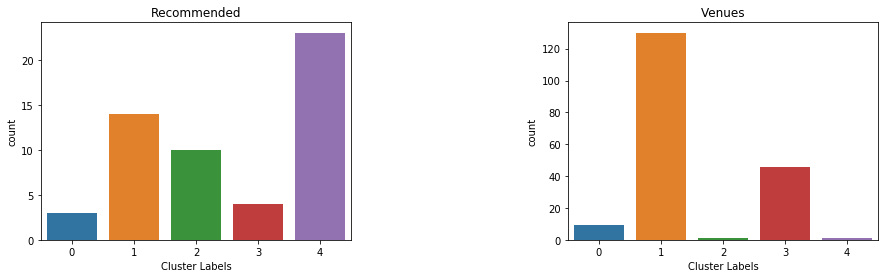

In [15]:
plt.figure(1,figsize=(15,4))

plt.subplots_adjust(hspace=0.5, wspace=0.7)

a = plt.subplot(121)
a.set_title('Recommended')
sns.countplot(recommended['Cluster Labels'])

a = plt.subplot(122)
a.set_title('Venues')
sns.countplot(venues['Cluster Labels'])

plt.show()

 _We can see that most of the Recommended Lies under **cluster '2'** whereas **Cluster '1'** contains maximum number of venues_

### Segmenting Recommended Data
Below given is the analysis for the Individuals who have a short trip to Bangalore. So the popular places are suggested.<br>
Places have been segmented on following 2 parameters:
#### On basis of Categories
##### Categories are as mentioned below
<ul>
    <li>Restaurant</li>
    <li>Clothing Stores</li>
    <li>Cafes</li>
    <li>Lounge</li>
    <li>Hotel</li>
</ul>

In [16]:
recommended_restaurant = recommended[recommended['Category'] == 'Restaurant'].reset_index(drop = True)
recommended_cafe = recommended[recommended['Category'] == 'Cafe'].reset_index(drop = True)
recommended_hotel = recommended[recommended['Category'] == 'Hotel'].reset_index(drop = True)
recommended_lounge = recommended[recommended['Category'] == 'Lounge'].reset_index(drop = True)
recommended_clothing = recommended[recommended['Category'] == 'Clothing Store'].reset_index(drop = True)

### Visualization of Category distribution across different Clusters

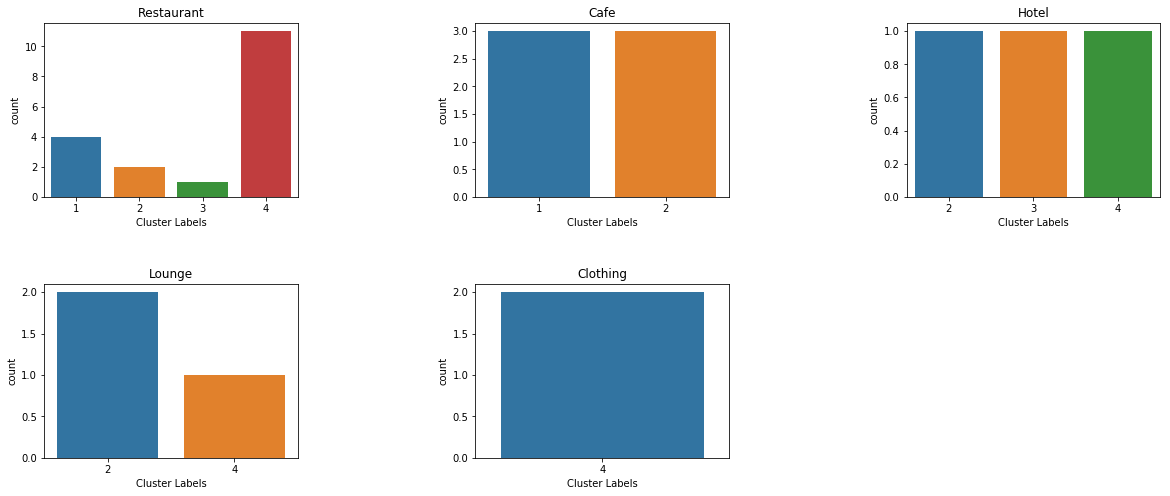

In [17]:
plt.figure(1,figsize=(20,8))

plt.subplots_adjust(hspace=0.5, wspace=0.7)

a = plt.subplot(231)
a.set_title('Restaurant')
sns.countplot(recommended_restaurant['Cluster Labels'])

a = plt.subplot(232)
a.set_title('Cafe')
sns.countplot(recommended_cafe['Cluster Labels'])

a = plt.subplot(233)
a.set_title('Hotel')
sns.countplot(recommended_hotel['Cluster Labels'])

a = plt.subplot(234)
a.set_title('Lounge')
sns.countplot(recommended_lounge['Cluster Labels'])

a = plt.subplot(235)
a.set_title('Clothing')
sns.countplot(recommended_clothing['Cluster Labels'])


plt.show()


Clearly, we can say that **Cluster 4** have more Restaurant, whereas other venues are almost equally distributed.

In [18]:
recommended_restaurant

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Toscano,UB City Level 2 Concorde Block (24 Vittal Mall...,12.971980,77.596066,Italian Restaurant,Restaurant,4
1,J W Kitchen,Near U B City (Vittal Mallya Road),12.972410,77.594592,Asian Restaurant,Restaurant,2
2,Shiro,"3rd Flr., UB City, Vittal Mallya Rd. (Lavelle ...",12.971900,77.596236,Japanese Restaurant,Restaurant,4
3,Café Noir,"2nd Floor, UB City, Vittal Mallya Road, Near L...",12.971995,77.596001,French Restaurant,Restaurant,4
4,Alba,JW Marriott Bengaluru (Vittal Mallya Road),12.972541,77.594594,Italian Restaurant,Restaurant,2
5,Sunny's,"50, Lavelle Road, Opposite Loom (Vittal Mallya...",12.972023,77.598454,Italian Restaurant,Restaurant,1
6,Fava,"#203, 2nd Flr, The Collection, UB City (Vittal...",12.972286,77.595966,Mediterranean Restaurant,Restaurant,4
7,Soda Bottle Openerwala,25/4 Lavelle Rd (Next to the Biere Club),12.970747,77.597607,Parsi Restaurant,Restaurant,1
8,Rasovara,India,12.971995,77.596079,Rajasthani Restaurant,Restaurant,4
9,Konark Kanteerava,"Kanteerava Stadium, Sampangirama Nagar,",12.970281,77.592165,Karnataka Restaurant,Restaurant,3


In [19]:
recommended_cafe

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Coffee Day Square,"#23/2, Near UB City (Near UB City)",12.971671,77.594132,Coffee Shop,Cafe,2
1,BBC by JW Marriott,Bangalore,12.971847,77.595088,Café,Cafe,2
2,"Starbucks, Vittal Mallya Road","38/1 Vittal Mallya Road, Bangalore",12.971321,77.598190,Coffee Shop,Cafe,1
3,Glen's Bakehouse,Lavelle Road,12.969916,77.597517,Café,Cafe,1
4,cafe coffee day,Sampige road opp to shanthi sagar near sai bab...,12.972392,77.594108,Coffee Shop,Cafe,2
5,Barista Lavazza,Lavelle road,12.971334,77.597802,Café,Cafe,1


In [20]:
recommended_hotel

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,JW Marriott Hotel Bengaluru,24/1 Vittal Mallya Road,12.972362,77.595051,Hotel,Hotel,2
1,Oakwood Premier Prestige Bangalore,"Vittal Mallya Road, UB City",12.972002,77.596056,Hotel,Hotel,4
2,ibis Bangalore City Centre,India,12.967347,77.593958,Hotel,Hotel,3


In [21]:
recommended_lounge

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Skyye,"Uber Level, 16th Flr., UB City, Vittal Mallya ...",12.971646,77.596242,Lounge,Lounge,4
1,Spice Terrace,JW Mariot,12.972254,77.595200,Lounge,Lounge,2
2,JW Marriott Executive Lounge,India,12.972120,77.594804,Lounge,Lounge,2


In [22]:
recommended_clothing

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Diesel Store,"Shop 1/1, Ground Floor, Concorde Towers, UB Ci...",12.971762,77.595947,Clothing Store,Clothing Store,4
1,DIESEL - For Successful Living,"1/1, Ground Flr, Concorde Towers, UB City (at ...",12.971846,77.595647,Clothing Store,Clothing Store,4


#### On basis of Clusters</h4>

In [23]:
recommended_Cluster_0 = recommended[recommended['Cluster Labels'] == 0].reset_index(drop = True)
recommended_Cluster_1 = recommended[recommended['Cluster Labels'] == 1].reset_index(drop = True)
recommended_Cluster_2 = recommended[recommended['Cluster Labels'] == 2].reset_index(drop = True)
recommended_Cluster_3 = recommended[recommended['Cluster Labels'] == 3].reset_index(drop = True)
recommended_Cluster_4 = recommended[recommended['Cluster Labels'] == 4].reset_index(drop = True)

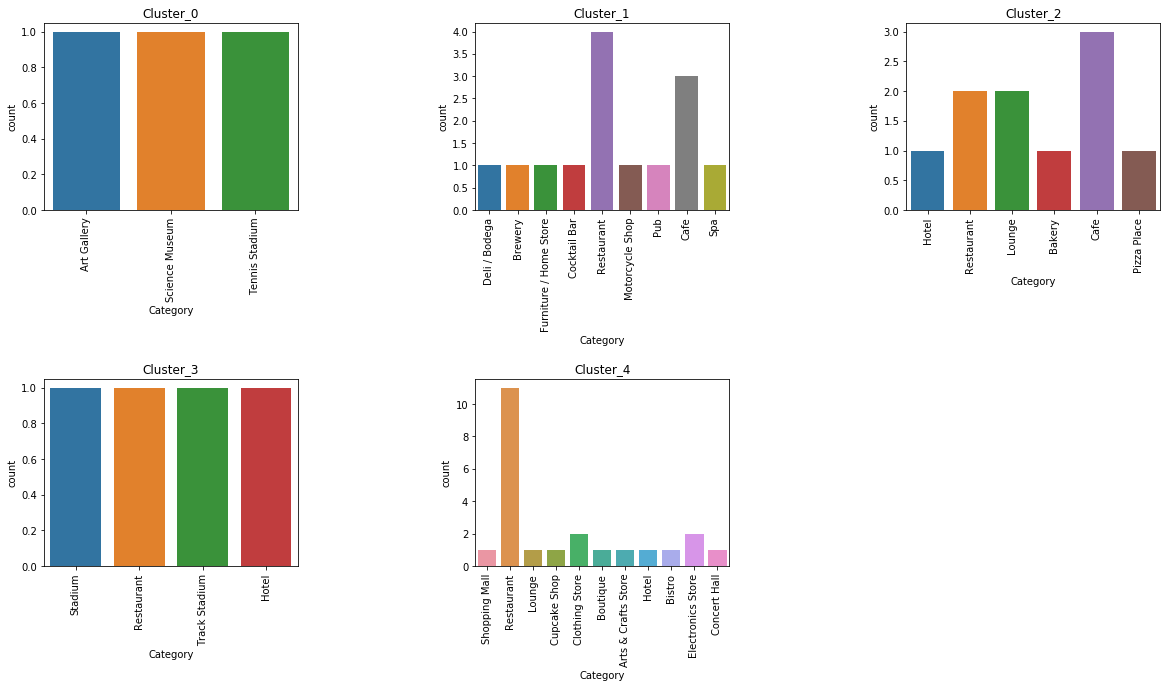

In [24]:
plt.figure(1,figsize=(20,10))

plt.subplots_adjust(hspace=0.9, wspace=0.7)

a = plt.subplot(231)
a.set_title('Cluster_0')
sns.countplot(recommended_Cluster_0['Category'])
plt.xticks(rotation=90)

a = plt.subplot(232)
a.set_title('Cluster_1')
sns.countplot(recommended_Cluster_1['Category'])
plt.xticks(rotation=90)

a = plt.subplot(233)
a.set_title('Cluster_2')
sns.countplot(recommended_Cluster_2['Category'])
plt.xticks(rotation=90)

a = plt.subplot(234)
a.set_title('Cluster_3')
sns.countplot(recommended_Cluster_3['Category'])
plt.xticks(rotation=90)

a = plt.subplot(235)
a.set_title('Cluster_4')
sns.countplot(recommended_Cluster_4['Category'])

plt.xticks(rotation=90)
plt.show()


**Cluster 2** has maximum venues followed by **Cluster 1**.

In [25]:
recommended_Cluster_0

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Venkatappa Art Gallery,Kasturba Road,12.974575,77.595792,Art Gallery,Art Gallery,0
1,Visvesvaraya Industrial and Technological Museum,Kasturba Road,12.974884,77.596526,Science Museum,Science Museum,0
2,KSLTA Tennis stadium,"Kasturba Rd, Shivaji Nagar",12.975094,77.594439,Tennis Stadium,Tennis Stadium,0


In [26]:
recommended_Cluster_1

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Smoke House Deli,"52,53 (Lavelle Road)",12.971656,77.598254,Deli / Bodega,Deli / Bodega,1
1,The Biere Club,20/2 Vittal Mallya Rd.,12.971061,77.597657,Brewery,Brewery,1
2,Good Earth - Bunglow Store,No.4 Walton Road (Off Lavelle Road),12.971606,77.597838,Furniture / Home Store,Furniture / Home Store,1
3,Margarita Lounge Bar,India,12.970741,77.597553,Cocktail Bar,Cocktail Bar,1
4,Sunny's,"50, Lavelle Road, Opposite Loom (Vittal Mallya...",12.972023,77.598454,Italian Restaurant,Restaurant,1
5,Soda Bottle Openerwala,25/4 Lavelle Rd (Next to the Biere Club),12.970747,77.597607,Parsi Restaurant,Restaurant,1
6,Harley Davidson,Lavelle Rd.,12.970505,77.597584,Motorcycle Shop,Motorcycle Shop,1
7,Bootlegger,36 Vittal Mallya Road,12.971159,77.597574,Pub,Pub,1
8,"Starbucks, Vittal Mallya Road","38/1 Vittal Mallya Road, Bangalore",12.971321,77.598190,Coffee Shop,Cafe,1
9,Le Cristaal,36 Vittal Mallya Road,12.971138,77.597548,Restaurant,Restaurant,1


In [27]:
recommended_Cluster_2

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,JW Marriott Hotel Bengaluru,24/1 Vittal Mallya Road,12.972362,77.595051,Hotel,Hotel,2
1,J W Kitchen,Near U B City (Vittal Mallya Road),12.972410,77.594592,Asian Restaurant,Restaurant,2
2,Spice Terrace,JW Mariot,12.972254,77.595200,Lounge,Lounge,2
3,JW Marriott Executive Lounge,India,12.972120,77.594804,Lounge,Lounge,2
4,Bengaluru Baking Co.,JW Marriott Bengaluru (Vittal Mallya Road),12.971761,77.595128,Bakery,Bakery,2
5,Coffee Day Square,"#23/2, Near UB City (Near UB City)",12.971671,77.594132,Coffee Shop,Cafe,2
6,Alba,JW Marriott Bengaluru (Vittal Mallya Road),12.972541,77.594594,Italian Restaurant,Restaurant,2
7,BBC by JW Marriott,Bangalore,12.971847,77.595088,Café,Cafe,2
8,cafe coffee day,Sampige road opp to shanthi sagar near sai bab...,12.972392,77.594108,Coffee Shop,Cafe,2
9,Domino's Pizza,Sai Baba Colony,12.972000,77.595000,Pizza Place,Pizza Place,2


In [28]:
recommended_Cluster_3

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Kanteerava Indoor Stadium,Corporation Circle,12.969619,77.593861,Stadium,Stadium,3
1,Konark Kanteerava,"Kanteerava Stadium, Sampangirama Nagar,",12.970281,77.592165,Karnataka Restaurant,Restaurant,3
2,Kanteerava Outdoor Stadium,Corporation Circle,12.968888,77.593051,Track Stadium,Track Stadium,3
3,ibis Bangalore City Centre,India,12.967347,77.593958,Hotel,Hotel,3


In [29]:
recommended_Cluster_4

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,UB City,at Vittal Mallya Rd,12.971709,77.595905,Shopping Mall,Shopping Mall,4
1,Toscano,UB City Level 2 Concorde Block (24 Vittal Mall...,12.971980,77.596066,Italian Restaurant,Restaurant,4
2,Shiro,"3rd Flr., UB City, Vittal Mallya Rd. (Lavelle ...",12.971900,77.596236,Japanese Restaurant,Restaurant,4
3,Skyye,"Uber Level, 16th Flr., UB City, Vittal Mallya ...",12.971646,77.596242,Lounge,Lounge,4
4,Café Noir,"2nd Floor, UB City, Vittal Mallya Road, Near L...",12.971995,77.596001,French Restaurant,Restaurant,4
5,Bliss Luxe Chocolate Lounge,UB City (Vittal Mallya Road),12.971525,77.596201,Cupcake Shop,Cupcake Shop,4
6,Diesel Store,"Shop 1/1, Ground Floor, Concorde Towers, UB Ci...",12.971762,77.595947,Clothing Store,Clothing Store,4
7,Louis Vuitton,UB City,12.971505,77.596077,Boutique,Boutique,4
8,Fava,"#203, 2nd Flr, The Collection, UB City (Vittal...",12.972286,77.595966,Mediterranean Restaurant,Restaurant,4
9,Rasovara,India,12.971995,77.596079,Rajasthani Restaurant,Restaurant,4


## Therefore we conclude that the tourist on a short-trip should visit locations segmented under Cluster 2 for the best experience.

### Segmenting Venues Data
This section displays analysis for people who have a considerable amount of time in Bangalore so as to explore Bangalore to a <br>much grater extent.

#### On basis of Categories</h4>

In [30]:
restaurant = venues[venues['Category'] == 'Restaurant'].reset_index(drop = True)
cafe = venues[venues['Category'] == 'Cafe'].reset_index(drop = True)
hotel = venues[venues['Category'] == 'Hotel'].reset_index(drop = True)
lounge = venues[venues['Category'] == 'Lounge'].reset_index(drop = True)
clothing = venues[venues['Category'] == 'Clothing Store'].reset_index(drop = True)

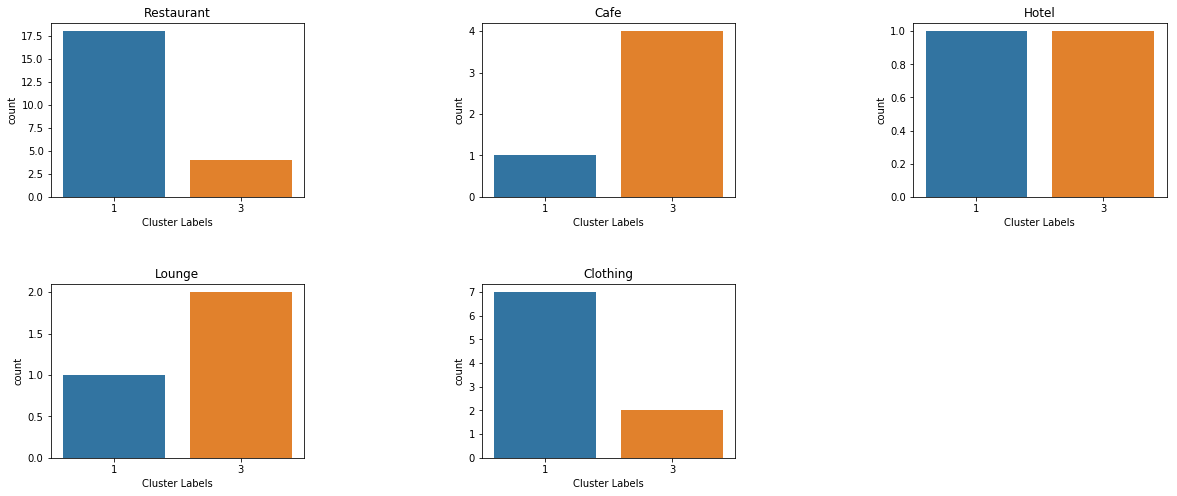

In [31]:
plt.figure(1,figsize=(20,8))

plt.subplots_adjust(hspace=0.5, wspace=0.7)

a = plt.subplot(231)
a.set_title('Restaurant')
sns.countplot(restaurant['Cluster Labels'])

a = plt.subplot(232)
a.set_title('Cafe')
sns.countplot(cafe['Cluster Labels'])

a = plt.subplot(233)
a.set_title('Hotel')
sns.countplot(hotel['Cluster Labels'])

a = plt.subplot(234)
a.set_title('Lounge')
sns.countplot(lounge['Cluster Labels'])

a = plt.subplot(235)
a.set_title('Clothing')
sns.countplot(clothing['Cluster Labels'])


plt.show()


**Cluster 1** has maximum number of Restaurants although cafe are situated more in **cluster 3**.

In [32]:
restaurant

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Alba,JW Marriott Bengaluru (Vittal Mallya Road),12.972541,77.594594,Italian Restaurant,Restaurant,3
1,Fava,"#203, 2nd Flr, The Collection, UB City (Vittal...",12.972286,77.595966,Mediterranean Restaurant,Restaurant,1
2,Café Noir,"2nd Floor, UB City, Vittal Mallya Road, Near L...",12.971995,77.596001,French Restaurant,Restaurant,1
3,J W Kitchen,Near U B City (Vittal Mallya Road),12.972410,77.594592,Asian Restaurant,Restaurant,3
4,Sanchez,Bangalore,12.972018,77.596025,Mexican Restaurant,Restaurant,1
5,Toscano,UB City Level 2 Concorde Block (24 Vittal Mall...,12.971980,77.596066,Italian Restaurant,Restaurant,1
6,Sriracha,Bangalore 560051,12.971904,77.595768,Asian Restaurant,Restaurant,1
7,Shiro,"3rd Flr., UB City, Vittal Mallya Rd. (Lavelle ...",12.971900,77.596236,Japanese Restaurant,Restaurant,1
8,Rasovara,India,12.971995,77.596079,Rajasthani Restaurant,Restaurant,1
9,Sanchos,UB City (Vittal Mallya Rd),12.972002,77.596050,Mexican Restaurant,Restaurant,1


In [33]:
cafe

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Coffee Day Square,"#23/2, Near UB City (Near UB City)",12.971671,77.594132,Coffee Shop,Cafe,3
1,BBC by JW Marriott,Bangalore,12.971847,77.595088,Café,Cafe,3
2,The Cafe Oakwood,UB City,12.971959,77.595944,Café,Cafe,1
3,Global Tree Cafe,F&B Building (St.Marks Road),12.971649,77.594632,Coffee Shop,Cafe,3
4,cafe coffee day,Sampige road opp to shanthi sagar near sai bab...,12.972392,77.594108,Coffee Shop,Cafe,3


In [34]:
hotel

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,JW Marriott Hotel Bengaluru,24/1 Vittal Mallya Road,12.972362,77.595051,Hotel,Hotel,3
1,Oakwood Premier Prestige Bangalore,"Vittal Mallya Road, UB City",12.972002,77.596056,Hotel,Hotel,1


In [35]:
lounge

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,JW Marriott Executive Lounge,India,12.972120,77.594804,Lounge,Lounge,3
1,Spice Terrace,JW Mariot,12.972254,77.595200,Lounge,Lounge,3
2,Skyye,"Uber Level, 16th Flr., UB City, Vittal Mallya ...",12.971646,77.596242,Lounge,Lounge,1


In [36]:
clothing

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,DIESEL - For Successful Living,"1/1, Ground Flr, Concorde Towers, UB City (at ...",12.971846,77.595647,Clothing Store,Clothing Store,1
1,Diesel Store,"Shop 1/1, Ground Floor, Concorde Towers, UB Ci...",12.971762,77.595947,Clothing Store,Clothing Store,1
2,Burberry,"Canberra Block, Vittal Mallya Road (Canberra B...",12.971727,77.596144,Clothing Store,Clothing Store,1
3,United Colors of Benetton,"16/3, Commisseriate Road,",12.971599,77.594562,Clothing Store,Clothing Store,3
4,Zegna Store,"The Collection, Ground Floor (UB City, Vittal ...",12.971884,77.595343,Clothing Store,Clothing Store,1
5,ETRO,"UB City, Ground Floor (Lavelle Road)",12.971890,77.595837,Clothing Store,Clothing Store,1
6,Versace,India,12.971678,77.596089,Clothing Store,Clothing Store,1
7,Samsar,Bangalore,12.971599,77.594563,Clothing Store,Clothing Store,3
8,Shimmer,UB City,12.972003,77.596100,Clothing Store,Clothing Store,1


#### On basis of Clusters</h4>

In [37]:
Cluster_0 = venues[venues['Cluster Labels'] == 0].reset_index(drop = True)
Cluster_1 = venues[venues['Cluster Labels'] == 1].reset_index(drop = True)
Cluster_2 = venues[venues['Cluster Labels'] == 2].reset_index(drop = True)
Cluster_3 = venues[venues['Cluster Labels'] == 3].reset_index(drop = True)
Cluster_4 = venues[venues['Cluster Labels'] == 4].reset_index(drop = True)

### Let's Visualise the different venues in different Clusters

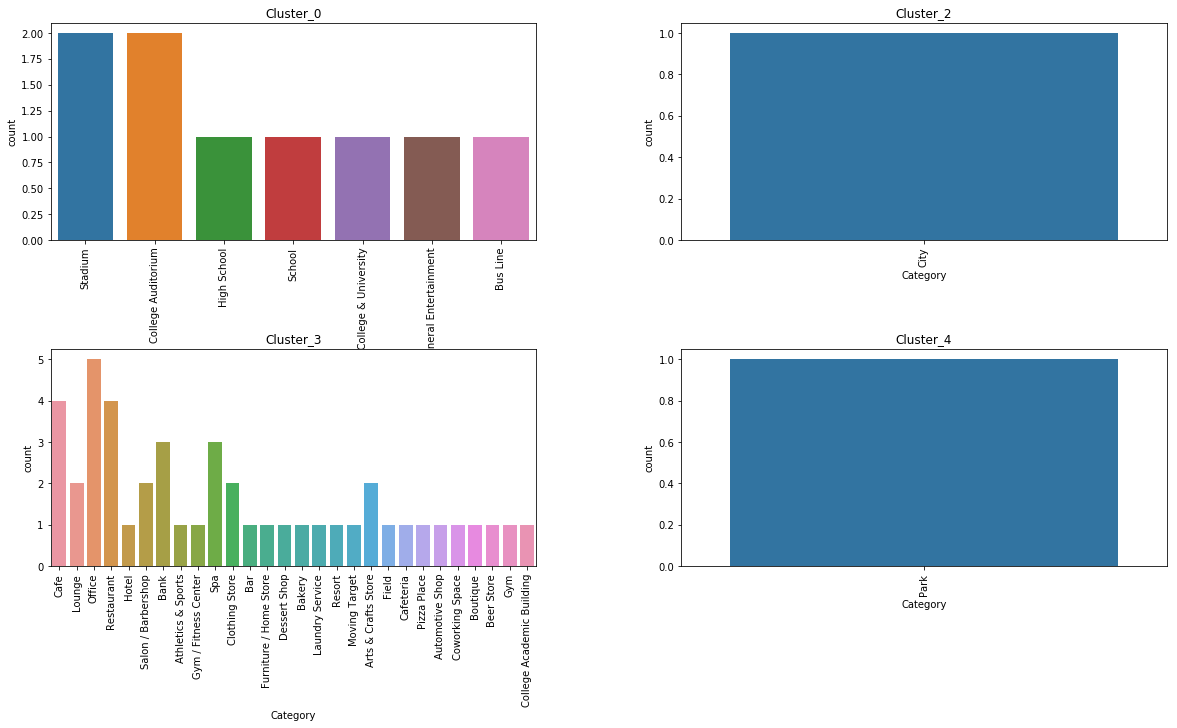

In [46]:
plt.figure(1,figsize=(20,10))

plt.subplots_adjust(hspace=0.5, wspace=0.3)

a = plt.subplot(221)
a.set_title('Cluster_0')
sns.countplot(Cluster_0['Category'])
plt.xticks(rotation=90)

a = plt.subplot(222)
a.set_title('Cluster_2')
sns.countplot(Cluster_2['Category'])
plt.xticks(rotation=90)

a = plt.subplot(223)
a.set_title('Cluster_3')
sns.countplot(Cluster_3['Category'])
plt.xticks(rotation=90)

a = plt.subplot(224)
a.set_title('Cluster_4')
sns.countplot(Cluster_4['Category'])

plt.xticks(rotation=90)
plt.show()


Since **Cluster 1** has more venues so the plot is plotted seperately.

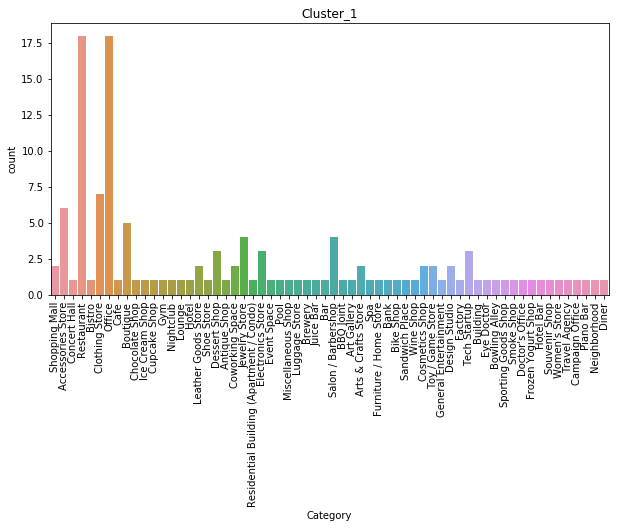

In [39]:
plt.figure(figsize = (10,5))
plt.title('Cluster_1')
sns.countplot(Cluster_1['Category'])
plt.xticks(rotation=90)
plt.show()

Above plots concludes that **Cluster 1** has maximum number of venues preceded by **Cluster 0**.

In [40]:
Cluster_0

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Kanteerava Indoor Stadium,Corporation Circle,12.969619,77.593861,Stadium,Stadium,0
1,Sree Kanteerava Stadium,India,12.969581,77.593107,Stadium,Stadium,0
2,st joseph Indian High school,India,12.970782,77.595155,College Auditorium,College Auditorium,0
3,St joseph's indian high school,Bangalore,12.970610,77.594690,High School,High School,0
4,St.Joseph's School Grounds,Virtual Mallya Rd.,12.970507,77.594942,School,School,0
5,St. Joseph's Indian Composite PU College,India,12.970282,77.594674,General College & University,General College & University,0
6,st.josephs indian institutions,Vittal Mallya Road,12.970948,77.594825,College Auditorium,College Auditorium,0
7,Nilgiris Cake Show,Vittal Mallya Rd,12.970560,77.595239,General Entertainment,General Entertainment,0
8,Vittal Mallya Rd Bus Stop,Vittal Mallya Rd,12.969631,77.594730,Bus Line,Bus Line,0


In [41]:
Cluster_1

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,UB City,at Vittal Mallya Rd,12.971709,77.595905,Shopping Mall,Shopping Mall,1
1,Tumi,India,12.971861,77.595837,Accessories Store,Accessories Store,1
2,UB City Amphitheatre,UB City (at Vittal Mallya Road),12.972286,77.595841,Concert Hall,Concert Hall,1
3,Fava,"#203, 2nd Flr, The Collection, UB City (Vittal...",12.972286,77.595966,Mediterranean Restaurant,Restaurant,1
4,Farzi Cafe,UB City (Vittal Mallya Road),12.972136,77.595803,Bistro,Bistro,1
5,DIESEL - For Successful Living,"1/1, Ground Flr, Concorde Towers, UB City (at ...",12.971846,77.595647,Clothing Store,Clothing Store,1
6,3M,India,12.972594,77.596520,Office,Office,1
7,The Cafe Oakwood,UB City,12.971959,77.595944,Café,Cafe,1
8,Café Noir,"2nd Floor, UB City, Vittal Mallya Road, Near L...",12.971995,77.596001,French Restaurant,Restaurant,1
9,Diesel Store,"Shop 1/1, Ground Floor, Concorde Towers, UB Ci...",12.971762,77.595947,Clothing Store,Clothing Store,1


In [42]:
Cluster_2

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Bangalore,Karnātaka,12.972938,77.604415,City,City,2


In [43]:
Cluster_3

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Coffee Day Square,"#23/2, Near UB City (Near UB City)",12.971671,77.594132,Coffee Shop,Cafe,3
1,JW Marriott Executive Lounge,India,12.972120,77.594804,Lounge,Lounge,3
2,Cafe Coffee Day HQ,"23/2,Coffee Day Square,Vittal Mallaya Road",12.971827,77.594242,Office,Office,3
3,Alba,JW Marriott Bengaluru (Vittal Mallya Road),12.972541,77.594594,Italian Restaurant,Restaurant,3
4,BBC by JW Marriott,Bangalore,12.971847,77.595088,Café,Cafe,3
5,JW Marriott Hotel Bengaluru,24/1 Vittal Mallya Road,12.972362,77.595051,Hotel,Hotel,3
6,INFOSYS 3,Cafe Coffee Day INFOSYS CAMPUS 3 RD COUNTER EL...,12.971598,77.593996,Office,Office,3
7,J W Salon,J W Marriott (Vittal Mallaya Road),12.972399,77.594329,Salon / Barbershop,Salon / Barbershop,3
8,HDFC Ltd,Bangalore,12.973422,77.595323,Bank,Bank,3
9,Crossfit at JW Marriott,India,12.972207,77.594613,Athletics & Sports,Athletics & Sports,3


In [44]:
Cluster_4

,VenueName,Address,Latitude,Longitude,SubCategory,Category,Cluster Labels
0,Cubbon Park,M G Road,12.977042,77.595277,Park,Park,4


### An individual who has considerable amount of time shoud visit location under <span style='color:blue'> Cluster 3.</span>

<h1 style="color:red">Results and Discussion:</h1>

<ul>
<li>Through the analysis done in the notebook we can that <span style='color:red'> <b>recommended_Cluster_4</b></span> contains the popular location to visit when on a strict schedule whereas <span style='color:red'> <b>Cluster_3</b></span> lists the best places to be visited when one has ample amount of time to explore Bangalore.</li>
    <li>Due the difference in the number of places in <span style='color:red'> <b>recommended</b></span> and <span style='color:red'> <b>venues</b></span> data cluster number differ for same location in certain cases.</li>
</ul>

<h1 style="color:red">Conclusion:</h1>

Purpose of this project was to identify Bangalore venues in order to aid travellers in narrowing down the search for location to be visited. By fetching data from Foursquare API we have first identified Recommended Venues that were rated by previous visitors. Clustering of those locations was then performed in order to create major venues of interest (containing greater number of different category locations) and table of those venues were created to be used as reference for final exploration by Travellers.

Final decision on optimal visiting location will be made by visitors based on specific characteristics of neighbourhoods and locations in every cluster, taking into consideration additional factors like attractiveness of each location levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighbourhood etc.